#### Zugriff aus python mit Hilfe von Pandas

In [1]:
import sqlite3 as sql
import pandas as pd
import torch
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib
import dateutil
import datetime

Baue eine Verbindung zur meiner Datenbank auf:

In [59]:
conn = sql.connect('/Users/cm/20190403/home-assistant_v2.db')

### Die Daten aus der SQL mit Hilfe von Pandas auslesen

Tabellennamen ermitteln

In [60]:
table_names = pd.read_sql_query('select name from sqlite_master where type = "table"', conn)
table_names

,name
0,events
1,recorder_runs
2,schema_changes
3,states


Tabelle events einlesen

In [61]:
events = pd.read_sql_query('select * from events', conn)

DatabaseError: database disk image is malformed

In [ ]:
events.iloc[26013,:]

#### Tabelle recorder_runs einlesen

In [62]:
recorder_runs = pd.read_sql_query('select * from recorder_runs', conn)

In [63]:
recorder_runs.head()

,run_id,start,end,closed_incorrect,created
0,1,2019-03-14 20:25:23.434947,2019-03-14 20:30:46.775168,0,2019-03-14 20:25:26.805756
1,2,2019-03-14 20:30:58.627587,2019-03-14 20:34:30.843322,0,2019-03-14 20:31:01.310771
2,3,2019-03-14 20:34:43.543716,2019-03-14 20:37:48.007651,0,2019-03-14 20:34:46.236966
3,4,2019-03-14 20:37:59.974984,2019-03-14 20:42:23.147717,0,2019-03-14 20:38:02.612598
4,5,2019-03-14 20:42:35.949202,2019-03-14 20:59:04.860145,0,2019-03-14 20:42:38.634857


#### Tabelle schema_changes einlesen

In [64]:
schema_changes = pd.read_sql_query('select * from schema_changes', conn)

In [65]:
schema_changes.head()

,change_id,schema_version,changed
0,1,7,2019-03-14 20:25:26.737487


#### Tabelle states einlesen

In [66]:
states = pd.read_sql_query('select * from states', conn)

In [67]:
states.iloc[24922,:]

IndexError: single positional indexer is out-of-bounds

### Vertiefung der Datensuche in der states Tabelle entity sensor

In [68]:
sensor = states[states['entity_id'].str.contains('sensor')]

In [69]:
sensor.tail()

,state_id,domain,entity_id,state,attributes,event_id,last_changed,last_updated,created,context_id,context_user_id
17154,31914,sensor,sensor.sleeping_room_wt_current_temperature,20.0,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",34297,2019-04-03 18:02:58.039054,2019-04-03 18:02:58.039054,2019-04-03 18:02:58.220114,afece66434a04fe6b592d8f9c3798b0e,None
17157,31917,sensor,sensor.kitchen_wt_current_temperature,21.0,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",34300,2019-04-03 18:03:59.025692,2019-04-03 18:03:59.025692,2019-04-03 18:03:59.096195,3e422574a39942a1b0fd83b8536bc3d8,None
17161,31921,sensor,sensor.sleeping_room_ht_current_temperature,20.1,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",34304,2019-04-03 18:06:01.017089,2019-04-03 18:06:01.017089,2019-04-03 18:06:01.102234,cf4dd9e30b324547919e3f14b4d0a2c7,None
17163,31923,sensor,sensor.sleeping_room_wt_current_temperature,20.1,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",34306,2019-04-03 18:06:01.039685,2019-04-03 18:06:01.039685,2019-04-03 18:06:01.240959,0ae46bd4e19640d290864ff78263563d,None
17167,31927,sensor,sensor.living_room_wt_current_temperature,21.2,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",34310,2019-04-03 18:08:03.023211,2019-04-03 18:08:03.023211,2019-04-03 18:08:03.106600,3463ec6522d34edf93a0876b824bbb2a,None


In [70]:
state_sensor_living_room  = sensor[sensor['entity_id'].str.contains('sleeping')]
state_sensor_living_room

,state_id,domain,entity_id,state,attributes,event_id,last_changed,last_updated,created,context_id,context_user_id
6362,21122,sensor,sensor.sleeping_room_wt_current_temperature,unknown,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",22246,2019-03-25 19:57:44.957944,2019-03-25 19:57:44.957944,2019-03-25 19:57:50.431029,68cf50e23ad3484bb9575dc6e2b62b33,None
6363,21123,sensor,sensor.sleeping_room_wt_set_temperature,unknown,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",22247,2019-03-25 19:57:44.958609,2019-03-25 19:57:44.958609,2019-03-25 19:57:50.508226,b6a1507572ef4490a70ad44065ad66d3,None
6364,21124,sensor,sensor.sleeping_room_wt_mode,unknown,"{""unit_of_measurement"": """", ""friendly_name"": ""...",22248,2019-03-25 19:57:44.959259,2019-03-25 19:57:44.959259,2019-03-25 19:57:50.573307,b64113f7c73b4eeca424eb33d3dc2e15,None
6365,21125,sensor,sensor.sleeping_room_ht_current_temperature,unknown,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",22249,2019-03-25 19:57:44.959937,2019-03-25 19:57:44.959937,2019-03-25 19:57:50.638977,26dc8fa464b841a68fe5107f2ad21bb6,None
6366,21126,sensor,sensor.sleeping_room_ht_set_temperature_bath,unknown,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",22250,2019-03-25 19:57:44.960641,2019-03-25 19:57:44.960641,2019-03-25 19:57:50.706741,344155b663c04d399a919fe4f0a91320,None
6367,21127,sensor,sensor.sleeping_room_ht_mode,unknown,"{""unit_of_measurement"": """", ""friendly_name"": ""...",22251,2019-03-25 19:57:44.961328,2019-03-25 19:57:44.961328,2019-03-25 19:57:50.787316,d15d90cdc8954e50b381e06ac5d451d8,None
6402,21162,sensor,sensor.sleeping_room_wt_current_temperature,20.6,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",22319,2019-03-25 19:57:46.430942,2019-03-25 19:57:46.430942,2019-03-25 19:57:55.192481,37cec9a01db9446fb9e26ee0e98c51f7,None
6403,21163,sensor,sensor.sleeping_room_wt_set_temperature,20.0,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",22320,2019-03-25 19:57:46.432872,2019-03-25 19:57:46.432872,2019-03-25 19:57:55.269186,a0798b4eb1374074b64bda3cb5997ec5,None
6404,21164,sensor,sensor.sleeping_room_wt_mode,auto,"{""unit_of_measurement"": """", ""friendly_name"": ""...",22321,2019-03-25 19:57:46.434217,2019-03-25 19:57:46.434217,2019-03-25 19:57:55.338051,8a02e65053964d13914ba539bfe069a7,None
6405,21165,sensor,sensor.sleeping_room_ht_current_temperature,0.0,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",22322,2019-03-25 19:57:46.435481,2019-03-25 19:57:46.435481,2019-03-25 19:57:55.400056,56d83a7014b7480f9d819821ff38e6b7,None


In [71]:
end_date = np.datetime64('2019-03-29 23:59:00')
start_date = np.datetime64('2019-03-26 00:00:00')

In [72]:
state_sensor_living_room_clean = state_sensor_living_room.loc[:,('entity_id','state','last_updated')]
state_sensor_living_room_clean = state_sensor_living_room_clean[state_sensor_living_room_clean['entity_id'].str.contains('temperature')]
#state_sensor_living_room_clean = state_sensor_living_room_clean[state_sensor_living_room_clean['entity_id'].str.contains('wt')]
living_room_wt_tcurr = state_sensor_living_room_clean[state_sensor_living_room_clean['entity_id'].str.contains('current')]
living_room_wt_tset = state_sensor_living_room_clean[state_sensor_living_room_clean['entity_id'].str.contains('set')]


In [73]:
living_room_wt_tcurr['last_updated'] = living_room_wt_tcurr['last_updated'].map(lambda x: dateutil.parser.parse(x))

/Users/cm/anaconda3/envs/week_program/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
living_room_wt_tset['last_updated'] = living_room_wt_tset['last_updated'].map(lambda x: dateutil.parser.parse(x))

/Users/cm/anaconda3/envs/week_program/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [75]:
living_room_wt_tcurr = living_room_wt_tcurr[(living_room_wt_tcurr['last_updated'] > start_date) & (living_room_wt_tcurr['last_updated'] < end_date)]
living_room_wt_tcurr['state'] = living_room_wt_tcurr['state'].astype(float)

In [76]:
living_room_wt_tset = living_room_wt_tset[(living_room_wt_tset['last_updated'] > start_date) & (living_room_wt_tset['last_updated'] < end_date)]
living_room_wt_tset['state'] = living_room_wt_tset['state'].astype(float)
living_room_wt_tset

,entity_id,state,last_updated
6933,sensor.sleeping_room_ht_set_temperature_bath,20.0,2019-03-26 05:01:11.018369
6935,sensor.sleeping_room_ht_set_temperature_bath,18.0,2019-03-26 05:04:14.013843
6993,sensor.sleeping_room_ht_set_temperature_bath,20.0,2019-03-26 06:58:05.879058
6994,sensor.sleeping_room_wt_set_temperature,20.0,2019-03-26 06:58:05.894879
7122,sensor.sleeping_room_ht_set_temperature_bath,12.0,2019-03-26 08:48:49.013622
7123,sensor.sleeping_room_wt_set_temperature,12.0,2019-03-26 08:48:49.041735
7136,sensor.sleeping_room_ht_set_temperature_bath,20.0,2019-03-26 09:01:01.016536
7138,sensor.sleeping_room_wt_set_temperature,20.0,2019-03-26 09:01:01.044578
7769,sensor.sleeping_room_wt_set_temperature,12.0,2019-03-26 20:16:52.041068
7771,sensor.sleeping_room_ht_set_temperature_bath,12.0,2019-03-26 20:16:52.047629


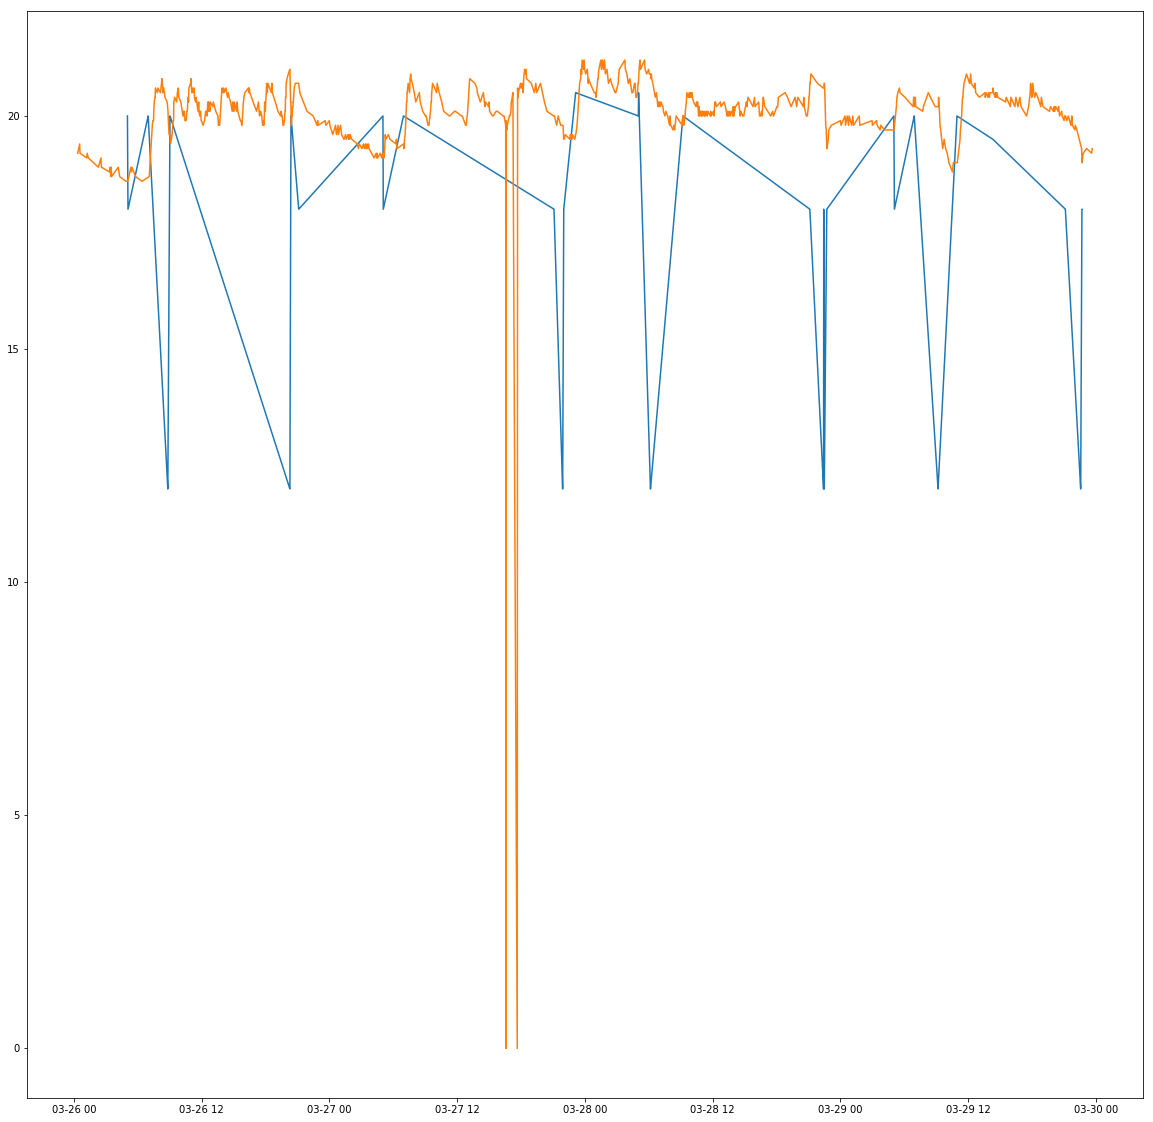

In [77]:
dates = matplotlib.dates.date2num(living_room_wt_tcurr['last_updated'])
fig1 = matplotlib.pyplot.figure(figsize=[20,20])
dates2 = matplotlib.dates.date2num(living_room_wt_tset['last_updated'])
matplotlib.pyplot.plot_date(dates2, living_room_wt_tset['state'], '-')
matplotlib.pyplot.plot_date(dates, living_room_wt_tcurr['state'], '-');

In [78]:
end_date = np.datetime64('2019-04-01 23:59:00')
start_date = np.datetime64('2019-03-12 00:00:00')

In [79]:
pd.read_sql_query('SELECT entity_id, COUNT(*) as count FROM states GROUP BY entity_id', conn).head()

,entity_id,count
0,binary_sensor.bad_fensterkontakt_bad,7
1,binary_sensor.kuche_fensterkontakt_ku,15
2,binary_sensor.remote_ui,1
3,binary_sensor.schlafzimmer_fensterkontakt_sz,17
4,binary_sensor.wohnzimmer_fensterkontakt_nord,25


In [80]:
living_room_wt_tcurr = living_room_wt_tcurr[(living_room_wt_tcurr['last_updated'] > start_date) & (living_room_wt_tcurr['last_updated'] < end_date)]
living_room_wt_tcurr = living_room_wt_tcurr.sort_values(by=['state'])

### Vertiefung der Datensuche in der states Tabelle entity climate

In [81]:
climate = states[states['entity_id'].str.contains('climate')]

In [82]:
climate.head()

,state_id,domain,entity_id,state,attributes,event_id,last_changed,last_updated,created,context_id,context_user_id
2,14762,climate,climate.kuche_wandthermostat_ku,manual,"{""current_temperature"": 17.1, ""min_temp"": 4.5,...",15333,2019-03-19 12:22:26.953017,2019-03-21 20:53:10.910853,2019-03-21 20:53:10.920476,db71971761af464eb7e1cf61ddacb389,None
8,14768,climate,climate.kuche_wandthermostat_ku,manual,"{""current_temperature"": 16.8, ""min_temp"": 4.5,...",15339,2019-03-19 12:22:26.953017,2019-03-21 20:58:15.903207,2019-03-21 20:58:15.923933,43546b1dcaa64b669b7083caa7125fbc,None
9,14769,climate,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.7, ""min_temp"": 4.5,...",15340,2019-03-19 12:22:26.931085,2019-03-21 20:58:15.919782,2019-03-21 20:58:15.995962,6e869e6a5c984d5c8c2ed07a8f1f54e5,None
15,14775,climate,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.9, ""min_temp"": 4.5,...",15346,2019-03-19 12:22:26.931085,2019-03-21 21:03:20.902970,2019-03-21 21:03:20.926720,bf3e9795fbea4caea87ef0d4459ff3be,None
16,14776,climate,climate.schlafzimmer_wandthermostat_sz,manual,"{""current_temperature"": 16.8, ""min_temp"": 4.5,...",15347,2019-03-19 12:22:26.960718,2019-03-21 21:03:20.929233,2019-03-21 21:03:20.990934,979dc5d2b49148eda7a09ff6ccee441d,None


In [83]:
state_climate_living_room  = climate[climate['entity_id'].str.contains('schlaf')]
state_climate_living_room.head()

,state_id,domain,entity_id,state,attributes,event_id,last_changed,last_updated,created,context_id,context_user_id
16,14776,climate,climate.schlafzimmer_wandthermostat_sz,manual,"{""current_temperature"": 16.8, ""min_temp"": 4.5,...",15347,2019-03-19 12:22:26.960718,2019-03-21 21:03:20.929233,2019-03-21 21:03:20.990934,979dc5d2b49148eda7a09ff6ccee441d,None
23,14783,climate,climate.schlafzimmer_wandthermostat_sz,manual,"{""current_temperature"": 16.7, ""min_temp"": 4.5,...",15354,2019-03-19 12:22:26.960718,2019-03-21 21:08:25.907017,2019-03-21 21:08:25.928975,91637af2311f4ba28c0ed220f5c613c0,None
45,14805,climate,climate.schlafzimmer_wandthermostat_sz,manual,"{""current_temperature"": 16.6, ""min_temp"": 4.5,...",15376,2019-03-19 12:22:26.960718,2019-03-21 21:23:40.929579,2019-03-21 21:23:41.025367,6645c9dac9a444f985c89c87eb96c5b9,None
51,14811,climate,climate.schlafzimmer_wandthermostat_sz,manual,"{""current_temperature"": 16.7, ""min_temp"": 4.5,...",15382,2019-03-19 12:22:26.960718,2019-03-21 21:28:45.938857,2019-03-21 21:28:45.953618,359cd052dcbe4a17bb0beb1adb4981eb,None
109,14869,climate,climate.schlafzimmer_wandthermostat_sz,manual,"{""current_temperature"": 16.5, ""min_temp"": 4.5,...",15440,2019-03-19 12:22:26.960718,2019-03-21 22:14:28.899739,2019-03-21 22:14:29.042820,bf1c8ece6a7e46678709138b9bfea681,None


In [84]:
state_climate_living_room = state_climate_living_room.loc[:,('entity_id','state','attributes','last_updated')]
state_climate_living_room.tail()

,entity_id,state,attributes,last_updated
17112,climate.schlafzimmer_wandthermostat_sz,auto,"{""current_temperature"": 20.3, ""min_temp"": 4.5,...",2019-04-03 17:42:38.020986
17121,climate.schlafzimmer_wandthermostat_sz,auto,"{""current_temperature"": 20.1, ""min_temp"": 4.5,...",2019-04-03 17:47:43.934353
17153,climate.schlafzimmer_wandthermostat_sz,auto,"{""current_temperature"": 20.0, ""min_temp"": 4.5,...",2019-04-03 18:02:58.036863
17160,climate.schlafzimmer_thermostat_sz,auto,"{""current_temperature"": 20.1, ""min_temp"": 4.5,...",2019-04-03 18:06:01.008825
17162,climate.schlafzimmer_wandthermostat_sz,auto,"{""current_temperature"": 20.1, ""min_temp"": 4.5,...",2019-04-03 18:06:01.036983


In [85]:
state_climate_living_room['last_updated'] = state_climate_living_room['last_updated'].map(lambda x: dateutil.parser.parse(x))

In [86]:
state_climate_living_room = state_climate_living_room[(state_climate_living_room['last_updated'] > start_date)]

In [87]:
current_temp = []
set_temp = []
for value in state_climate_living_room['attributes']:
    json_acceptable_string = value.replace("'", "\"")
    dict = json.loads(json_acceptable_string)
    current_temp.append(dict['current_temperature'])
    set_temp.append(dict['temperature'])

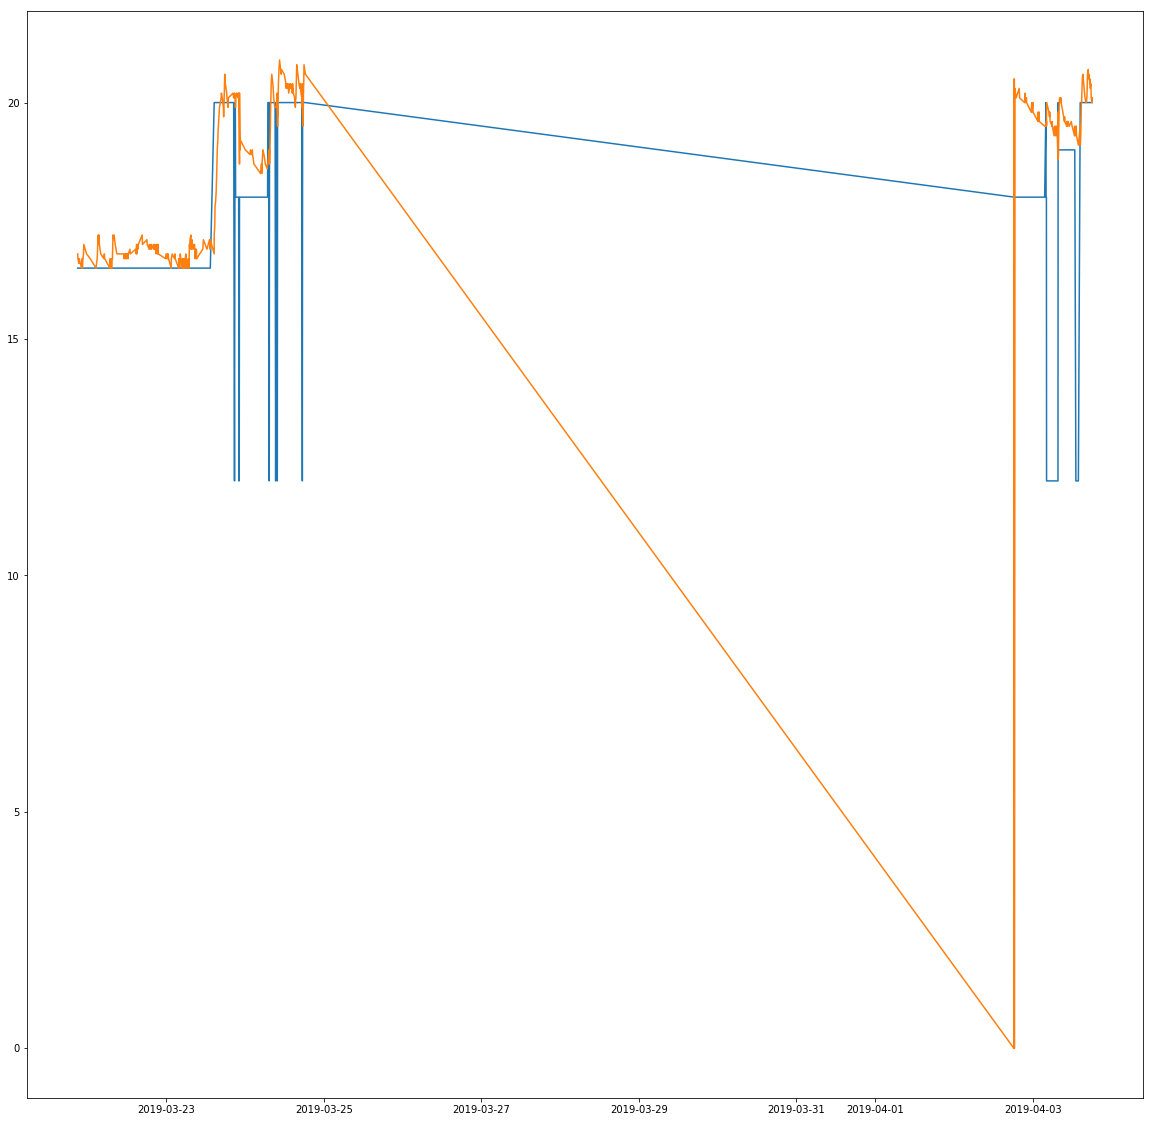

In [88]:
dates = matplotlib.dates.date2num(state_climate_living_room['last_updated'])
fig1 = matplotlib.pyplot.figure(figsize=[20,20])
matplotlib.pyplot.plot_date(dates, set_temp, '-')
matplotlib.pyplot.plot_date(dates, current_temp, '-');

In [89]:
pd.read_sql_query('select entity_id,state,attributes,last_updated from states where entity_id like "%climate%wohn%wand%"', conn)

,entity_id,state,attributes,last_updated
0,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.7, ""min_temp"": 4.5,...",2019-03-21 20:58:15.919782
1,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.9, ""min_temp"": 4.5,...",2019-03-21 21:03:20.902970
2,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.7, ""min_temp"": 4.5,...",2019-03-21 21:13:30.925355
3,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.9, ""min_temp"": 4.5,...",2019-03-21 21:18:33.946381
4,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.7, ""min_temp"": 4.5,...",2019-03-21 21:23:40.920109
5,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.8, ""min_temp"": 4.5,...",2019-03-21 22:09:24.881308
6,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.7, ""min_temp"": 4.5,...",2019-03-21 22:14:28.873702
7,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.9, ""min_temp"": 4.5,...",2019-03-21 22:29:43.888221
8,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.7, ""min_temp"": 4.5,...",2019-03-21 22:34:48.892795
9,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.9, ""min_temp"": 4.5,...",2019-03-22 00:36:43.901250
